### 1. Problem statment

- Create a model to classify the Quality of an apple based on their features

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,FunctionTransformer,StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
import pickle

### 2. Data Collection

In [2]:
data = pd.read_csv(r"C:\Users\pavan\Machine Learning\Projects\Project-5(Apple)\apple_quality.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


### 3. EDA Before Pre-Processing

In [5]:
df.shape

(4001, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [7]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

- This data contains some numerical data and categorical data.
- Column ACIDITY  is a numerical column so we can convert obejct to numerical type.
- This data contains one missing row.So we can simply remove those row.

In [8]:
df.dropna(axis= 0, inplace= True)

In [9]:
df.duplicated().sum()

0

In [10]:
df['Acidity'] = df['Acidity'].astype('float64')

In [11]:
df['Quality'].value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

In [12]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


### 4. Pre-Processing

In [13]:
feature_var = df[['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']]

In [14]:
feature_var.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [15]:
class_var = df['Quality']

In [16]:
class_var.head()

0    good
1    good
2     bad
3    good
4    good
Name: Quality, dtype: object

In [17]:
class_var_labelencoder = LabelEncoder()

class_var = class_var_labelencoder.fit_transform(class_var)

class_var = pd.Series(class_var)

In [18]:
class_var.head()

0    1
1    1
2    0
3    1
4    1
dtype: int32

## 5.EDA after Pre-processing

In [19]:
cor_mat = feature_var.corr()

In [20]:
cor_mat

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000


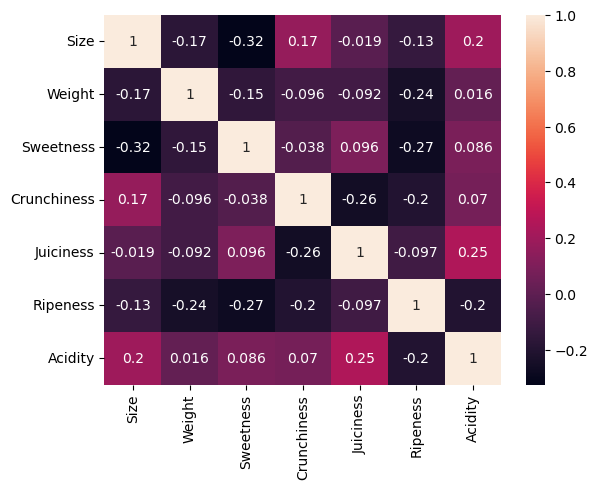

In [21]:
sns.heatmap(cor_mat,annot=True)
plt.show()

Based on above graph and table, all the features are indipendent only.So we will go with Naive Bayes theroem
- Our dataset is a numerical data set so we will go with Gaussian distribution.
- Then check each feature follows gaussian distribution or not.

##### By using Q-Q plot,I find that those columns are follows Gaussian distribution or Not

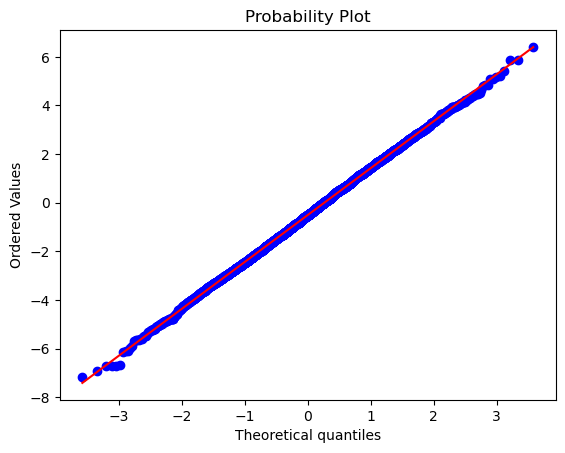

In [22]:
ss.probplot(feature_var["Size"],dist = "norm",fit = True,plot = plt)   # x_train["size"] = observed data , norm = theoritical data
plt.show()

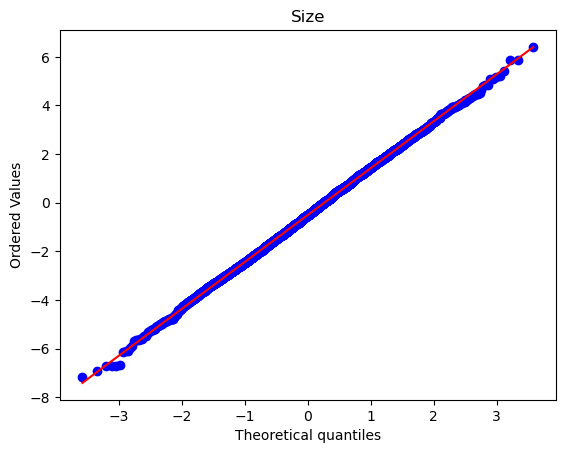

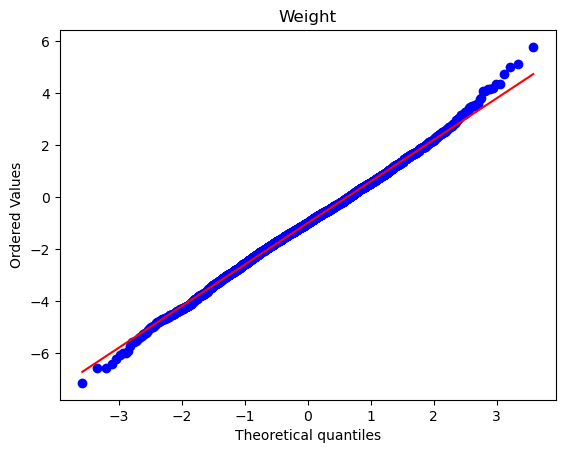

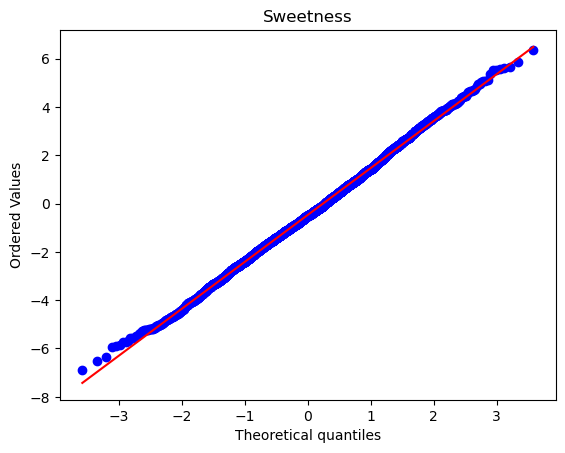

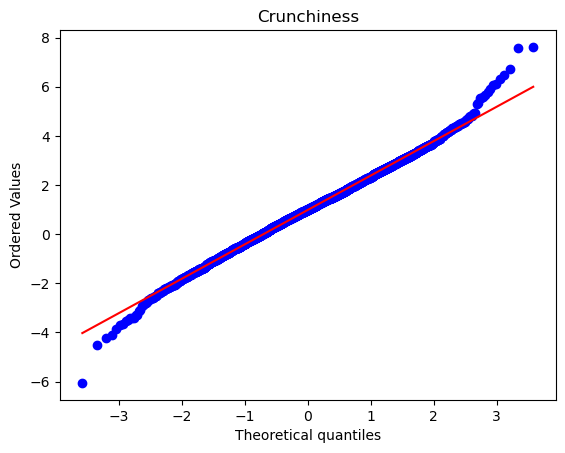

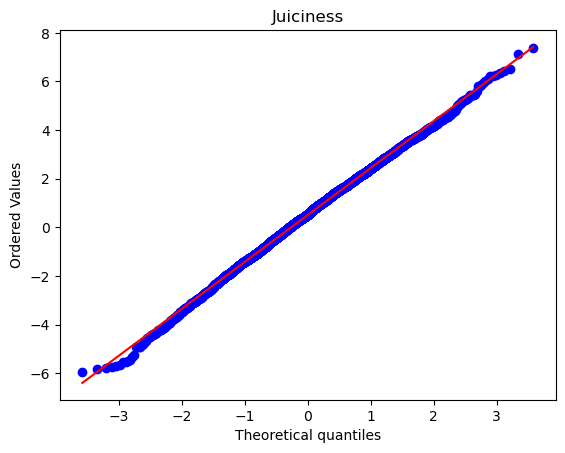

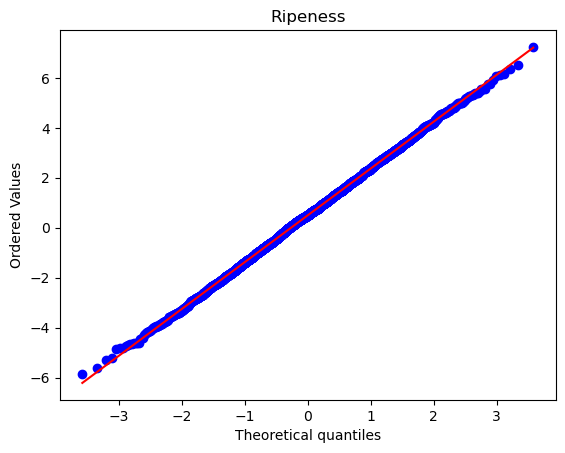

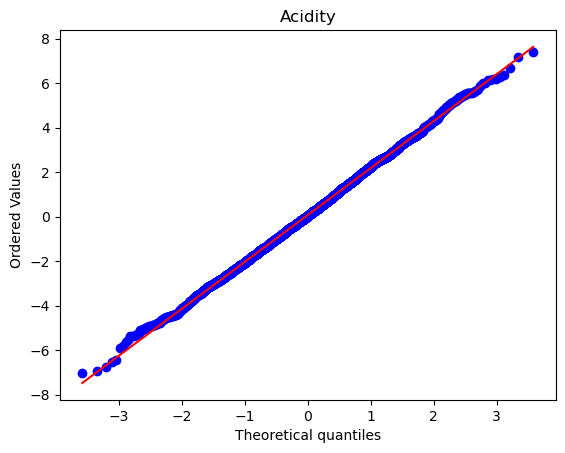

In [23]:
for y in feature_var.columns:      
    ss.probplot(feature_var[y],dist = "norm",fit = True,plot = plt)    
    plt.title(y)
    plt.show()

Based on above graphs, all the features follows Gaussian distribution,So we performe Gaussian Naive bayes

### 6. Feature Engineering

In [24]:
x_train, x_test, y_train, y_test = train_test_split(feature_var, class_var, test_size= 0.20, random_state= 1, stratify= class_var)

In [25]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 1042 to 596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3200 non-null   float64
 1   Weight       3200 non-null   float64
 2   Sweetness    3200 non-null   float64
 3   Crunchiness  3200 non-null   float64
 4   Juiciness    3200 non-null   float64
 5   Ripeness     3200 non-null   float64
 6   Acidity      3200 non-null   float64
dtypes: float64(7)
memory usage: 200.0 KB


In [26]:
numerical_data = x_train.select_dtypes(include= ['float64'])

In [27]:
numerical_pipe = Pipeline([('Null_values_Imputation',SimpleImputer(strategy= 'mean')),
                           ('StandardScalar',StandardScaler())])

In [28]:
pre_process_col_tran = ColumnTransformer(transformers= [('Numerical Pipline',numerical_pipe,numerical_data.columns)],
                                          remainder= 'passthrough')

In [29]:
feature_extraction_pipe = Pipeline([('Pre-Processing',pre_process_col_tran)])

In [30]:
final_x_train = feature_extraction_pipe.fit_transform(x_train)

final_x_test = feature_extraction_pipe.transform(x_test)

In [31]:
pickle.dump(feature_extraction_pipe, open(r"C:\Users\pavan\Machine Learning\Projects\Project-5(Apple)\Apple_feature_extraction.pkl",'wb'))

### 7. Training & Model Evalution

In [32]:
gaussian = GaussianNB()
model = gaussian.fit(final_x_train,y_train)

In [33]:
print(classification_report(y_test, model.predict(final_x_test)))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       399
           1       0.75      0.77      0.76       401

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



### 8. Training

In [34]:
m = feature_extraction_pipe.transform(x_test.iloc[[2]])
pred = model.predict(m) 

if pred == 0:
    print("good")
else:
    print("bad")

bad


### 9. Deploying

In [35]:
pickle.dump(model, open(r"C:\Users\pavan\Machine Learning\Projects\Project-5(Apple)\Apple_model.pkl",'wb'))

### 10. Conclusion

In conclusion, the testing results demonstrate the effectiveness and reliability of the predictive model in assessing the quality of apples. With its accurate predictions and robust performance, the model holds promise for enhancing quality control processes in apple production and ensuring consumer satisfaction.
